Sebelumnya pahami sigmoid dulu

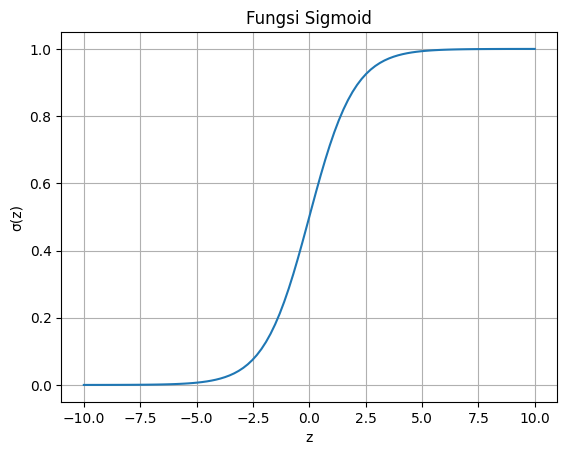

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Rentang nilai z
z = np.linspace(-10, 10, 100)
# Nilai sigmoid untuk setiap z
sigmoid_values = sigmoid(z)

# Plot fungsi sigmoid
plt.plot(z, sigmoid_values)
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Fungsi Sigmoid')
plt.grid(True)
plt.show()


Untuk Klasifikasi
mendeteksi smsnya spam atau bukan spam

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Memuat dataset
# Dataset dapat diunduh dari: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv('../csv/SMSSpamCollection.csv', 
                 sep='\t', names=['label', 'message'])


# Menampilkan beberapa data
print(df.head())

# Mengganti label 'ham' dengan 0 dan 'spam' dengan 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Memisahkan fitur dan label
X = df['message']
y = df['label']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi fitur numerik menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Membuat dan melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_tfidf)

# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Akurasi: {accuracy * 100:.2f}%')
print('Laporan Klasifikasi:')
print(report)


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Akurasi: 97.49%
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [14]:
# Testing dengan contoh kalimat
new_message = [" claim your reward now,call 0827481247124141"]
new_message_tfidf = vectorizer.transform(new_message)
prediction = model.predict(new_message_tfidf)
prediction_prob = model.predict_proba(new_message_tfidf)

print(f'Prediksi: {"Spam" if prediction[0] == 1 else "Ham"}')
print(f'Probabilitas Spam: {prediction_prob[0][1]:.2f}')
print(f'Probabilitas Ham: {prediction_prob[0][0]:.2f}')

Prediksi: Spam
Probabilitas Spam: 0.83
Probabilitas Ham: 0.17


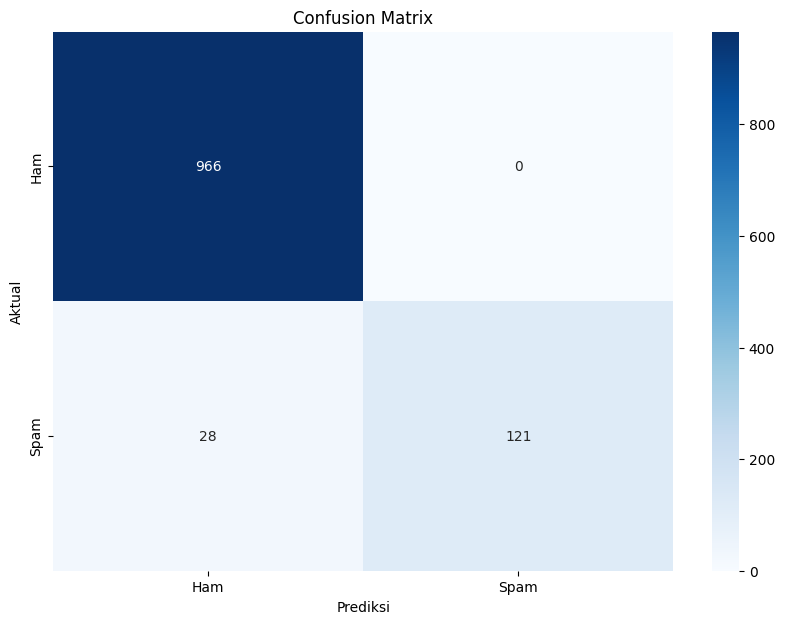

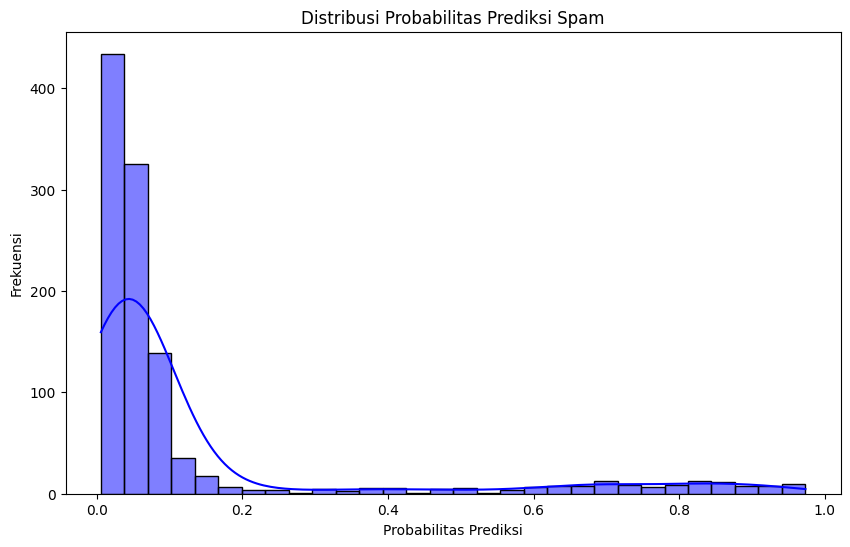

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Plot distribusi probabilitas prediksi
y_prob = model.predict_proba(X_test_tfidf)[:, 1]
plt.figure(figsize=(10, 6))
sns.histplot(y_prob, bins=30, kde=True, color='blue')
plt.title('Distribusi Probabilitas Prediksi Spam')
plt.xlabel('Probabilitas Prediksi')
plt.ylabel('Frekuensi')
plt.show()